# BITCOIN HISTORICAL PRICES AND ACTIVITY(2010-2024)

# About the Dataset

what is bitcoin?

         Bitcoin is the first decentralized cryptocurrency. Nodes in the peer-to-peer bitcoin network verify
         transaction through cryptography and record them in a public distributed ledger, called a blockchain,
         without central oversight.

Descripton of the dataset;

          This comprehensive dataset captures over a decade of Bitcoin's trading activity, meticulously detailing 
          daily market statistics from July 27, 2010, to April 25, 2024.It provides an indepth look at Bitcoin's
          price movements and trading volumes. Each record in the dataset consists of the following fields:
                
              1 Start: Indicates the start date of the data record.
                
              2 End: Indicates the end date of the data record.
                    
              3 Open: The price at which Bitcoin started trading at the beginning of the day.
                    
              4 High: The highest price point reached by Bitcoin during the day.
                
              5 Low: The lowest price point reached by Bitcoin during the day.
                    
              6 Close: The price at which Bitcoin ended trading at the close of the day.
                    
              7 Volume: Total volume of Bitcoin traded during the day.
                    
              8 Market cap: The total market value of Bitcoin at the end of the day.
                    
This dataset helps to analyzing market trends and market predictions.
              


# Loading Dependencies

In [1]:
# python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# library for and cross validation
from sklearn.model_selection import cross_val_score

#standardize features
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import LabelBinarizer,StandardScaler

#library for splitting data into train and test
from sklearn.model_selection import train_test_split

#import algorithms 
from sklearn.linear_model import Lasso,LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,BaggingRegressor,GradientBoostingRegressor,ExtraTreesRegressor
from sklearn.svm import LinearSVR




# Loading Dataset

In [2]:
df=pd.read_csv('bitcoin_2010-07-27_2024-04-25.csv')
df.head()

,Start,End,Open,High,Low,Close,Volume,Market Cap
0,2024-04-24,2024-04-25,66553.54,67070.40,63742.73,64291.07,1.384736e+11,1.294489e+12
1,2024-04-23,2024-04-24,66761.02,67174.02,65884.15,66386.61,1.408621e+11,1.308576e+12
2,2024-04-22,2024-04-23,64952.02,67180.03,64598.00,66818.89,1.400725e+11,1.299703e+12
3,2024-04-21,2024-04-22,64875.75,65638.74,64302.47,64896.87,1.326574e+11,1.278730e+12
4,2024-04-20,2024-04-21,63824.06,65351.33,63321.19,64857.99,1.537410e+11,1.263725e+12


In [3]:
df.tail()

,Start,End,Open,High,Low,Close,Volume,Market Cap
5016,2010-07-31,2010-08-01,0.0679,0.0679,0.0679,0.0679,0.0,0.0
5017,2010-07-30,2010-07-31,0.0627,0.0627,0.0627,0.0627,0.0,0.0
5018,2010-07-29,2010-07-30,0.0699,0.0699,0.0699,0.0699,0.0,0.0
5019,2010-07-28,2010-07-29,0.0589,0.0589,0.0589,0.0589,0.0,0.0
5020,2010-07-27,2010-07-28,0.0600,0.0600,0.0600,0.0600,0.0,0.0


In [4]:
df.sample(10)

,Start,End,Open,High,Low,Close,Volume,Market Cap
303,2023-06-26,2023-06-27,30441.380000,30637.240000,30010.620000,30273.800000,5.056122e+10,5.876880e+11
961,2021-09-06,2021-09-07,51747.229500,52707.174900,50987.360300,52639.244300,5.932028e+10,9.735276e+11
2618,2017-02-22,2017-02-23,1115.300000,1125.390000,1100.550000,1117.700000,1.581148e+08,1.797827e+10
141,2023-12-05,2023-12-06,41829.460000,44413.990000,41437.900000,44085.680000,4.954623e+10,8.294063e+11
1074,2021-05-16,2021-05-17,46770.570000,49696.092540,44041.162085,46395.050000,8.615255e+10,8.924412e+11
818,2022-01-27,2022-01-28,36786.693711,37201.842347,35519.974000,37201.842347,7.216674e+10,6.884229e+11
2806,2016-08-18,2016-08-19,573.216000,577.792000,573.216000,574.185000,5.697154e+07,9.106472e+09
2949,2016-03-28,2016-03-29,426.765000,426.857000,423.293000,424.103000,7.508747e+07,6.529001e+09
3818,2013-11-10,2013-11-11,348.820000,350.700000,277.240000,326.620000,0.000000e+00,3.737612e+09
453,2023-01-27,2023-01-28,23018.186100,23408.254821,22630.029300,23051.270800,7.458934e+10,4.418672e+11


In [5]:
df.shape

(5021, 8)

# find statistical informations

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,5021.0,1.116960e+04,1.644024e+04,0.057,2.297050e+02,2.398840e+03,1.653745e+04,7.296103e+04
High,5021.0,1.143190e+04,1.682973e+04,0.057,2.327050e+02,2.515270e+03,1.678589e+04,7.362843e+04
Low,5021.0,1.089434e+04,1.602569e+04,0.057,2.262200e+02,2.296810e+03,1.606517e+04,7.133336e+04
Close,5021.0,1.118360e+04,1.645983e+04,0.057,2.296890e+02,2.401800e+03,1.654998e+04,7.308795e+04
Volume,5021.0,2.034638e+10,3.260079e+10,0.000,6.755427e+06,9.920291e+08,3.281635e+10,2.121515e+11
Market Cap,5021.0,2.097941e+11,3.149496e+11,0.000,3.275508e+09,3.958854e+10,3.091939e+11,1.428493e+12


What can we see from this statistic?

The Average value of "open" is 1.11 and ,the highest value is 7.29

The Average value of "High" is 1.14 and ,the highest value is 7.36

The Average value of "Low" is 1.08 and ,the highest value is 7.13

The Average value of "Close" is 1.11 and ,the highest value is 7.30

The Average value of "Volume" is 2.03 and ,the highest value is 2.12

The Average value of "Market cap" is 2.09 and ,the highest value is 1.42






# to find duplicate?

In [7]:
df.duplicated().sum()

0

there is no duplicates in this dataset

In [8]:
df.isnull().mean()*100

Start         0.0
End           0.0
Open          0.0
High          0.0
Low           0.0
Close         0.0
Volume        0.0
Market Cap    0.0
dtype: float64

there is no Null values in the dataset

In [9]:
df.columns

Index(['Start', 'End', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'], dtype='object')

# informaton about dataset

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5021 entries, 0 to 5020
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Start       5021 non-null   object 
 1   End         5021 non-null   object 
 2   Open        5021 non-null   float64
 3   High        5021 non-null   float64
 4   Low         5021 non-null   float64
 5   Close       5021 non-null   float64
 6   Volume      5021 non-null   float64
 7   Market Cap  5021 non-null   float64
dtypes: float64(6), object(2)
memory usage: 313.9+ KB


# PERFORMING EDA

# Univariate Analysis

# Histogram

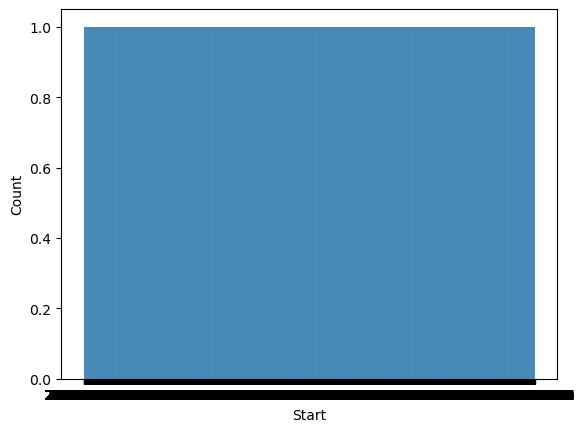

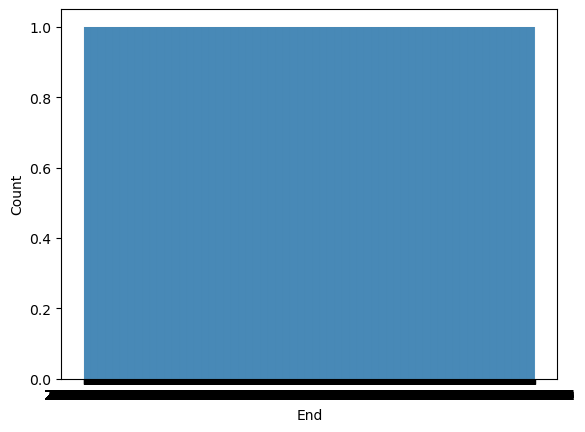

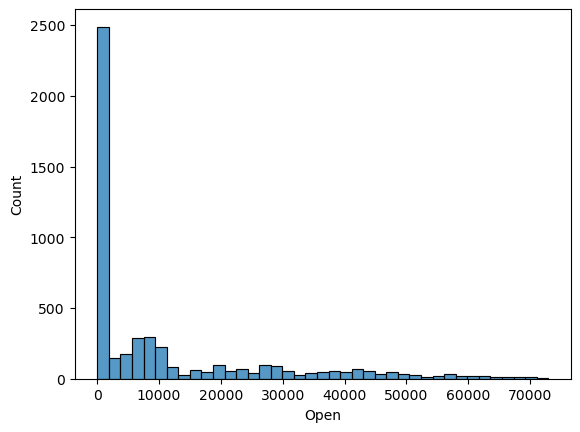

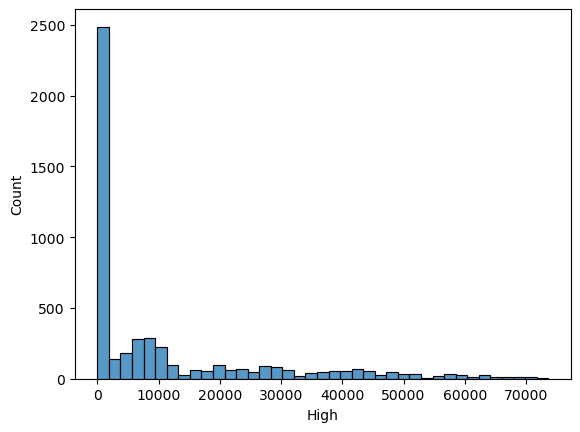

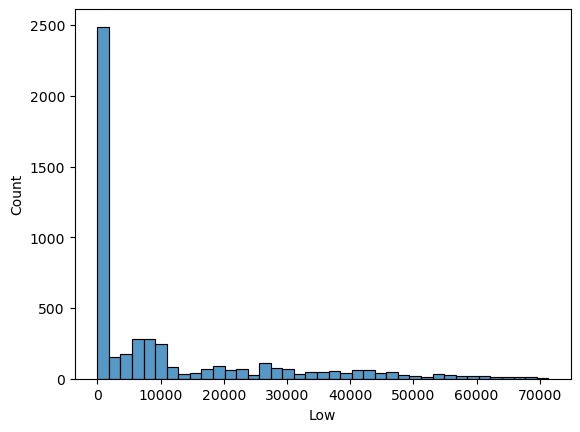

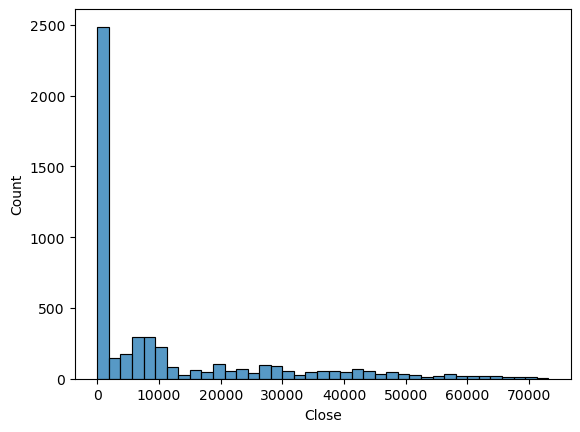

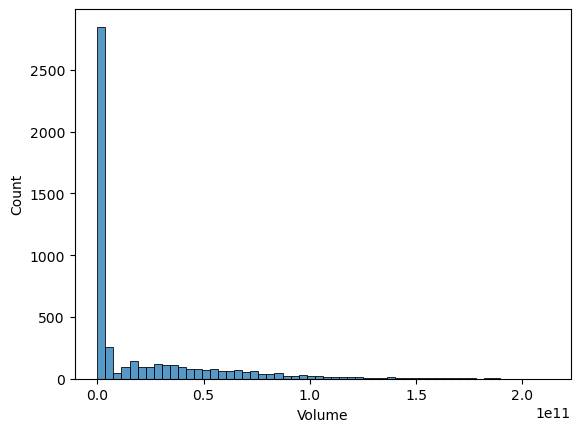

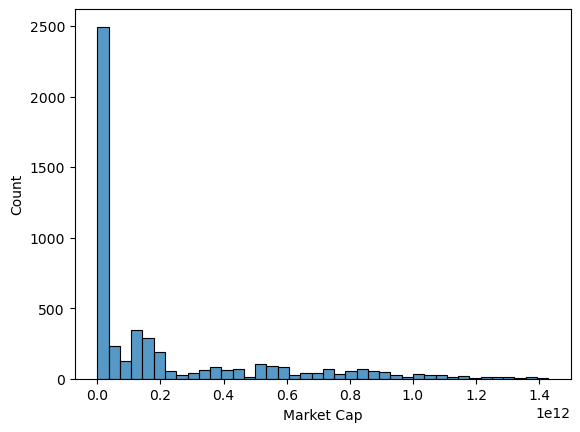

In [15]:
for i in df.columns:
    if df[i].dtypes !='objects':
        sns.histplot(x=df[i])
        plt.show()

# KDE plot

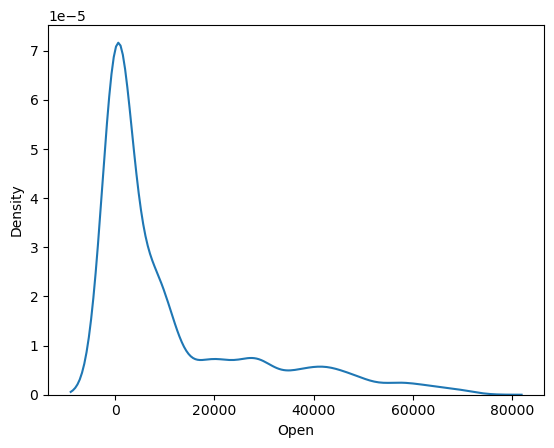

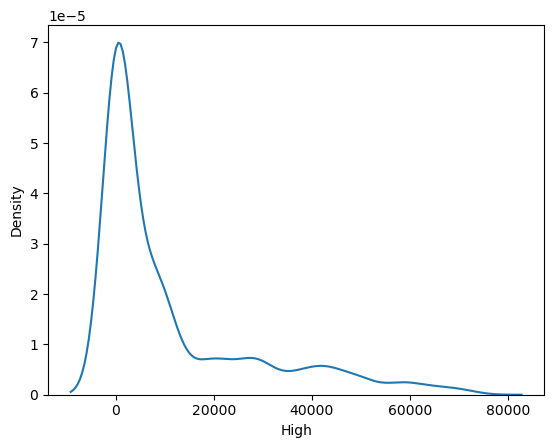

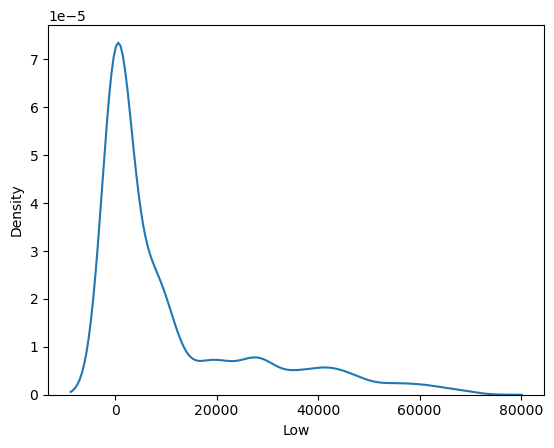

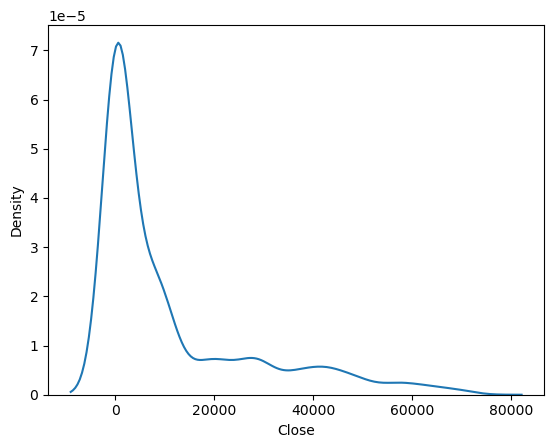

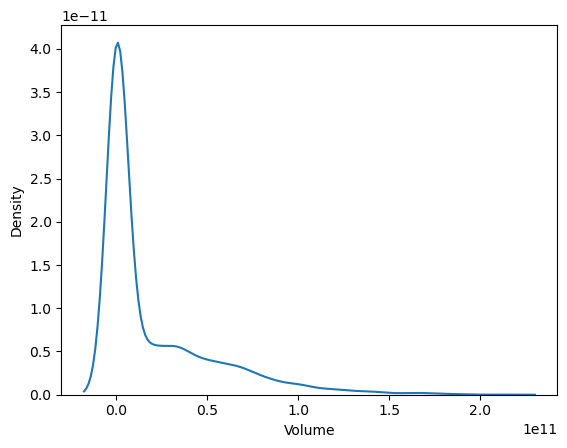

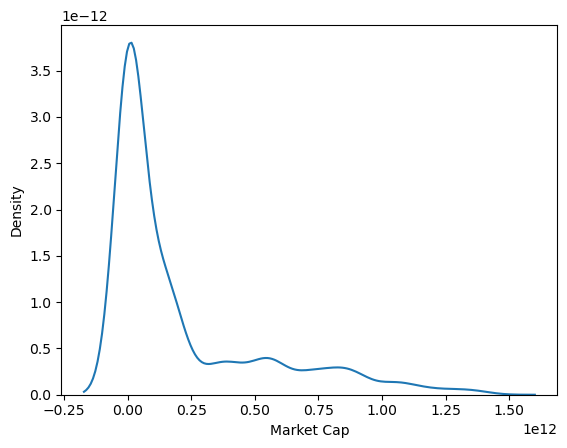

In [13]:
for i in df.columns:
    if df[i].dtypes !='object':
        sns.kdeplot(x=df[i])
        plt.show()

Analyzing the graph here,it turns out that the values of the variable 'Open', 'High', 'Low', 'Close', 'Volume','market cap' 
are relatively normally distributed 

# Boxplot

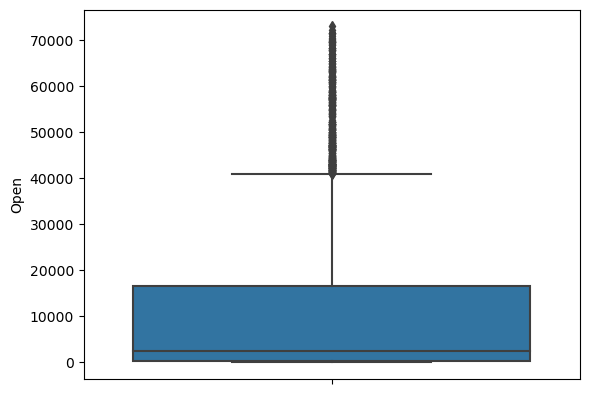

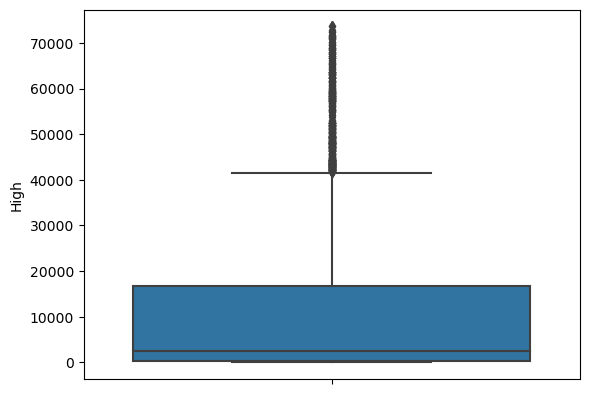

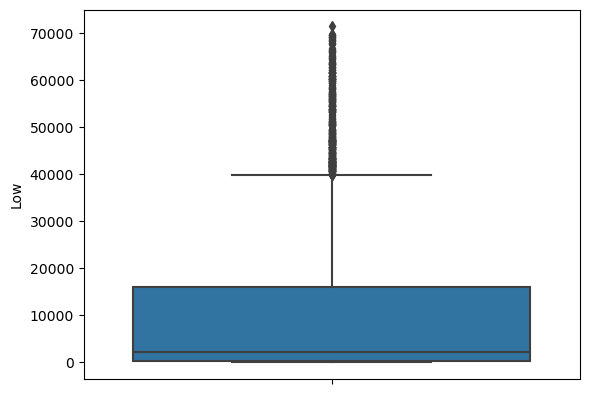

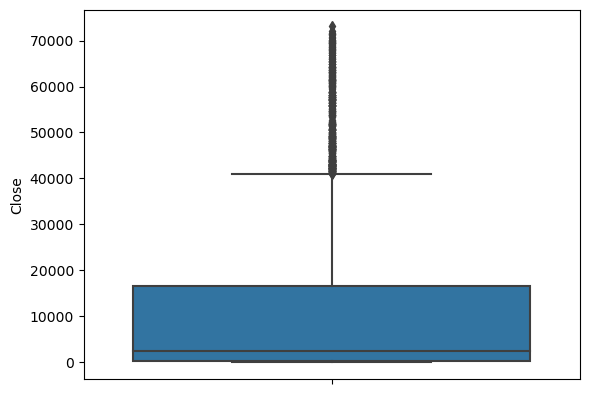

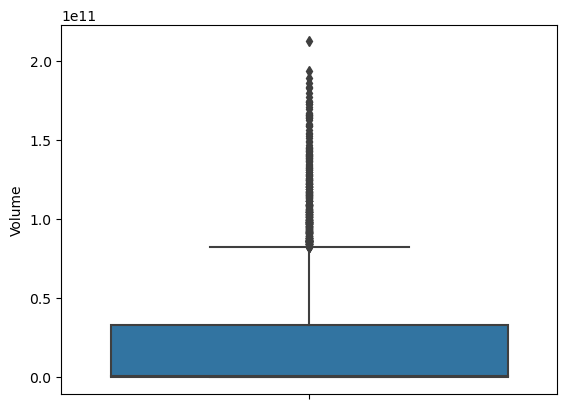

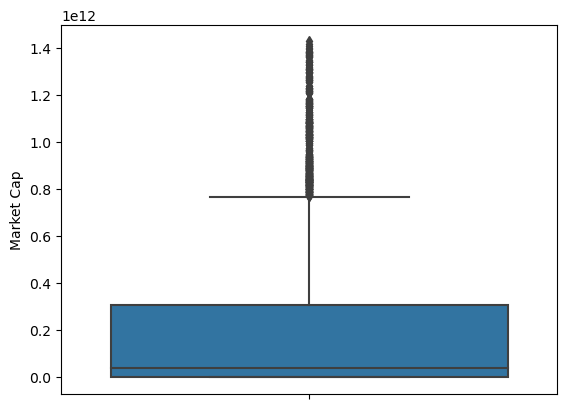

In [16]:
for i in df.columns:
    if df[i].dtypes !='object':
        sns.boxplot(y=df[i])
        plt.show()

# Treating outlier

outlier : Outliers are extreme values that differ from most other data points in a dataset. They can have a big impact 
          on your statistical analyses and skew the results of any hypothesis tests.

In [17]:
def out(col):
    Q3,Q1=np.nanpercentile(col,[75,25])
    IQR=Q3-Q1
    UL=Q3+1.5*IQR
    LL=Q1-1.5*Q1
    return UL,LL

In [18]:
for i in df.columns:
    if df[i].dtypes !='object':
        UL,LL=out(df[i])
        df[i]=np.where((df[i]>UL)|(df[i]<LL),np.nan,df[i])
        

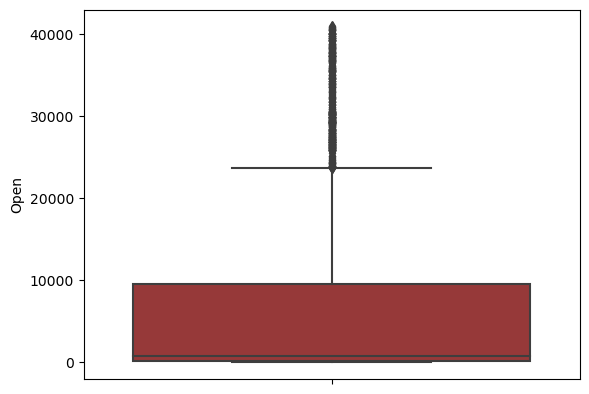

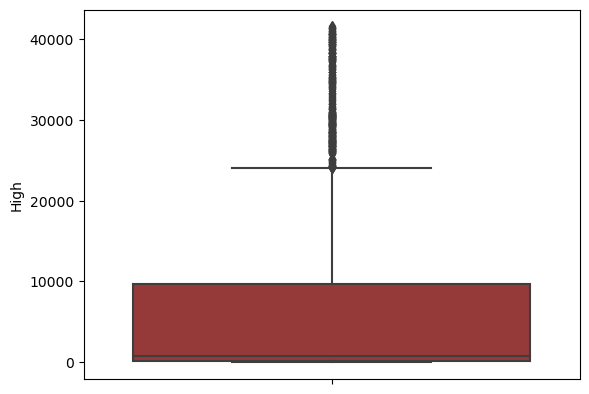

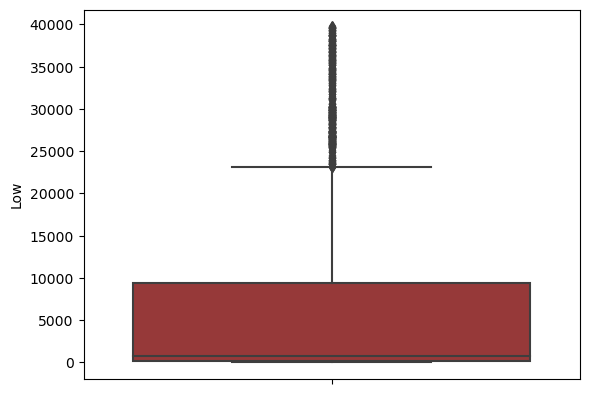

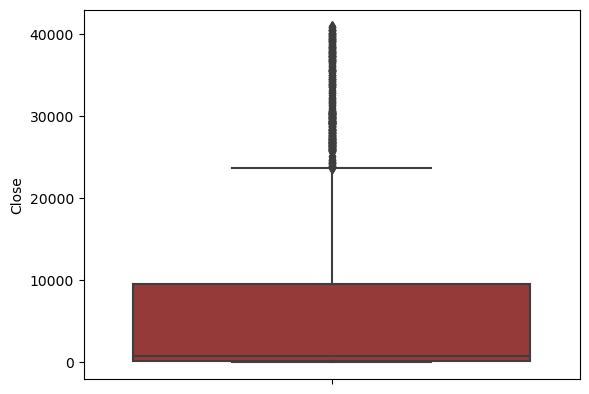

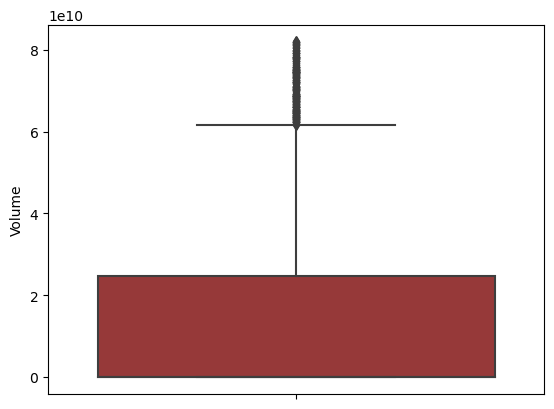

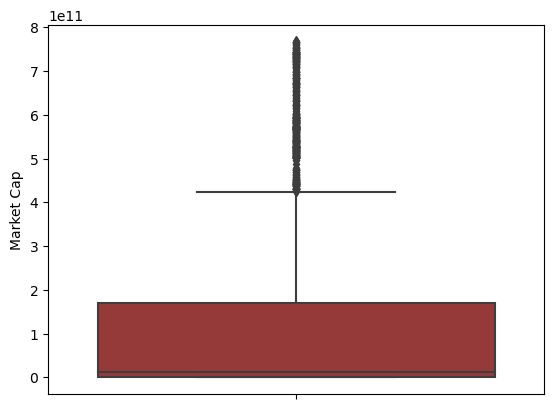

In [19]:
for i in df.columns:
    if df[i].dtypes !='object':
        sns.boxplot(y=df[i], color='brown')
        plt.show()

In [20]:
df.dropna(inplace=True)

In [21]:
df.columns

Index(['Start', 'End', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'], dtype='object')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4428 entries, 144 to 5020
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Start       4428 non-null   object 
 1   End         4428 non-null   object 
 2   Open        4428 non-null   float64
 3   High        4428 non-null   float64
 4   Low         4428 non-null   float64
 5   Close       4428 non-null   float64
 6   Volume      4428 non-null   float64
 7   Market Cap  4428 non-null   float64
dtypes: float64(6), object(2)
memory usage: 311.3+ KB


here, start and end is object format ,so it convert to datetime format

In [39]:
df['Start']=pd.to_datetime(df.Start)
df

df['End']=pd.to_datetime(df.End)
df

,Start,End,Open,High,Low,Close,Volume,Market Cap
144,2023-12-02,2023-12-03,38701.9700,39652.7000,38641.6300,39460.0000,2.831648e+10,7.607245e+11
145,2023-12-01,2023-12-02,37688.3900,38959.1100,37624.6500,38658.0600,2.915122e+10,7.511223e+11
146,2023-11-30,2023-12-01,37854.6600,38143.9400,37530.8900,37715.0200,2.813375e+10,7.388513e+11
147,2023-11-29,2023-11-30,37832.6700,38345.9800,37623.0100,37808.0100,6.838086e+10,7.420037e+11
148,2023-11-28,2023-11-29,37241.0700,38273.7000,36896.1700,37776.8900,7.509140e+10,7.319863e+11
...,...,...,...,...,...,...,...,...
5016,2010-07-31,2010-08-01,0.0679,0.0679,0.0679,0.0679,0.000000e+00,0.000000e+00
5017,2010-07-30,2010-07-31,0.0627,0.0627,0.0627,0.0627,0.000000e+00,0.000000e+00
5018,2010-07-29,2010-07-30,0.0699,0.0699,0.0699,0.0699,0.000000e+00,0.000000e+00
5019,2010-07-28,2010-07-29,0.0589,0.0589,0.0589,0.0589,0.000000e+00,0.000000e+00


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4428 entries, 144 to 5020
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Start       4428 non-null   datetime64[ns]
 1   End         4428 non-null   datetime64[ns]
 2   Open        4428 non-null   float64       
 3   High        4428 non-null   float64       
 4   Low         4428 non-null   float64       
 5   Close       4428 non-null   float64       
 6   Volume      4428 non-null   float64       
 7   Market Cap  4428 non-null   float64       
dtypes: datetime64[ns](2), float64(6)
memory usage: 311.3 KB


In [47]:
# extracting year,month,day
df['year']=pd.DatetimeIndex(df.Start).year
df['month']=pd.DatetimeIndex(df.Start).month
df['day']=pd.DatetimeIndex(df.Start).day
df.head(5)

,Start,End,Open,High,Low,Close,Volume,Market Cap,year,month,day
144,2023-12-02,2023-12-03,38701.97,39652.70,38641.63,39460.00,2.831648e+10,7.607245e+11,2023,12,2
145,2023-12-01,2023-12-02,37688.39,38959.11,37624.65,38658.06,2.915122e+10,7.511223e+11,2023,12,1
146,2023-11-30,2023-12-01,37854.66,38143.94,37530.89,37715.02,2.813375e+10,7.388513e+11,2023,11,30
147,2023-11-29,2023-11-30,37832.67,38345.98,37623.01,37808.01,6.838086e+10,7.420037e+11,2023,11,29
148,2023-11-28,2023-11-29,37241.07,38273.70,36896.17,37776.89,7.509140e+10,7.319863e+11,2023,11,28


# pie chart

In [57]:
a=df.groupby(['year'])['High'].sum()
a

year
2010    2.258670e+01
2011    2.055133e+03
2012    3.025081e+03
2013    7.253309e+04
2014    1.976573e+05
2015    1.014106e+05
2016    2.096630e+05
2017    1.497564e+06
2018    2.853140e+06
2019    2.748429e+06
2020    3.957652e+06
2021    2.440939e+06
2022    6.102388e+06
2023    8.661546e+06
Name: High, dtype: float64

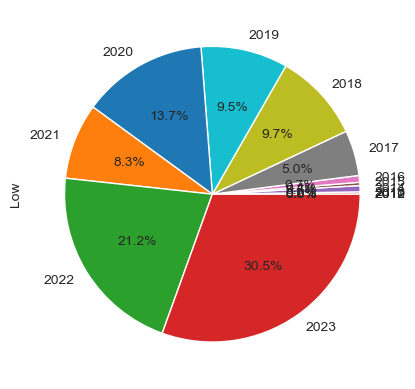

In [77]:
sns.set_style('ticks')
a.plot.pie(autopct='%.1f%%');

In this pie chart we analysed in the year 2023 is the High value.

# find five year volume

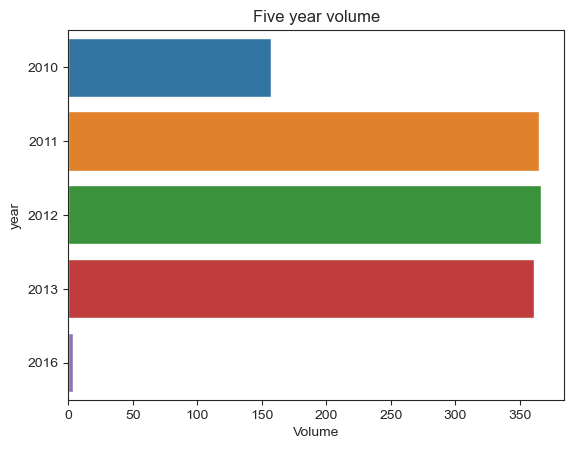

In [97]:
first_5_year = df['Volume'].value_counts().index[:5]

# Filter the DataFrame 
filtered_df = df[df['Volume'].isin(first_5_year)]

# Plot the countplot
sns.countplot(y='year', data=filtered_df)
plt.title('Five year volume')
plt.xlabel('Volume')
plt.ylabel('year')
plt.show()


# count plot

Text(0.5, 1.0, 'Model types')

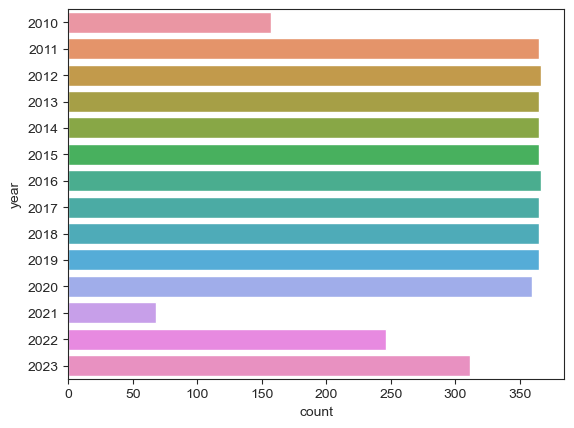

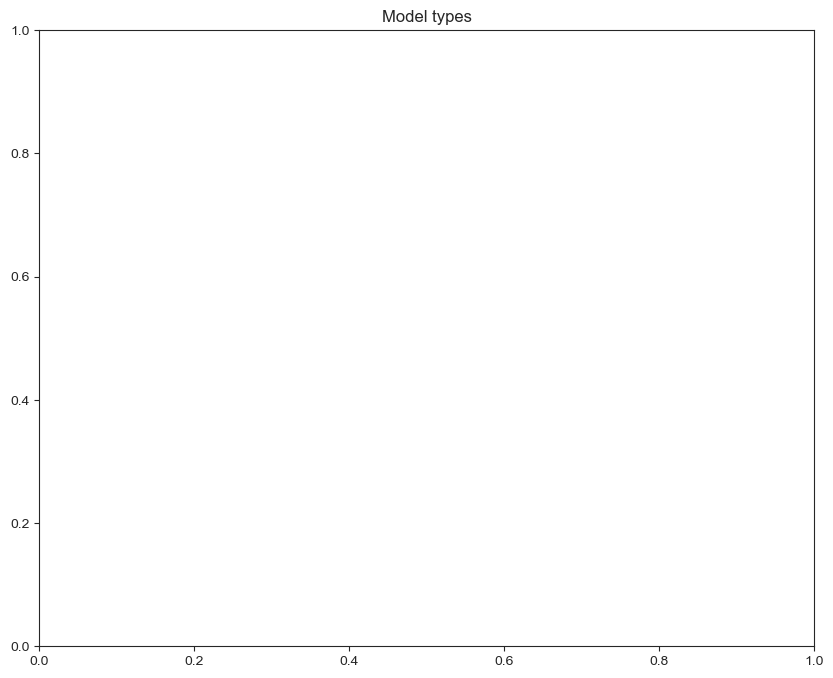

In [90]:
sns.countplot(y='year', data=df)
plt.figure(figsize=(10,8))
plt.title('Model types')


# Bivariate Analysis

# Barplot

In [100]:
df.columns

Index(['Start', 'End', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap',
       'year', 'month', 'day'],
      dtype='object')

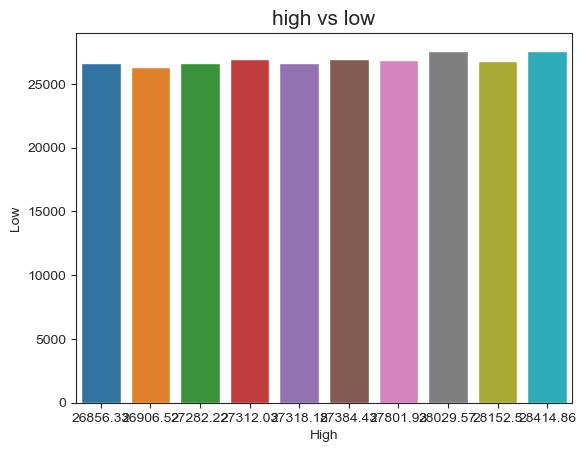

In [107]:
sns.barplot(data=df[170:180],x='High',y='Low')
plt.title("high vs low",fontsize=15)
plt.show()

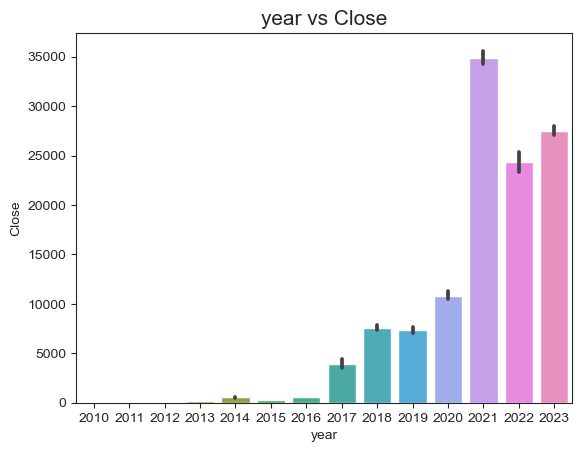

In [116]:
sns.barplot(x="year", y="Close", data=df)
plt.title("year vs Close",fontsize=15)
plt.show()

# scatterplot

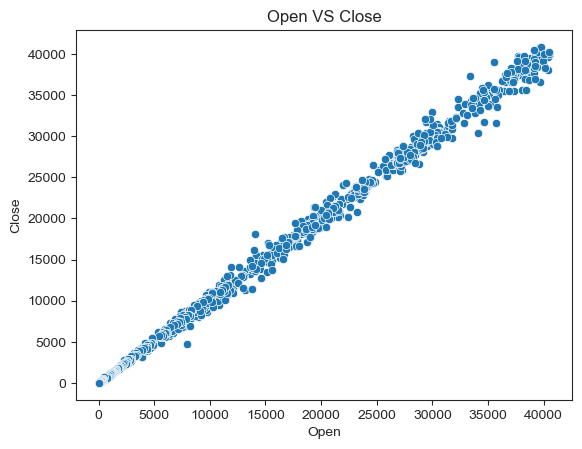

In [119]:
sns.scatterplot(data=df,x='Open',y='Close')
plt.title('Open VS Close');

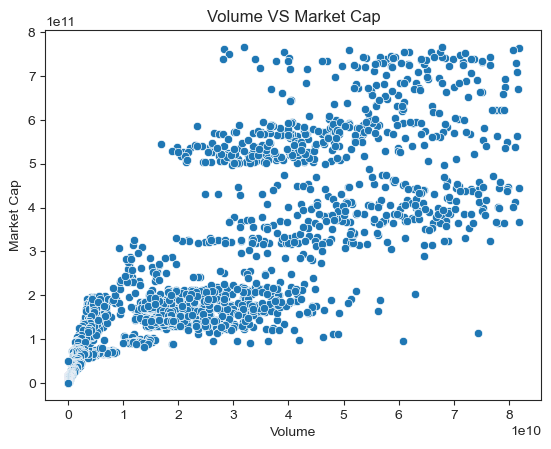

In [120]:
sns.scatterplot(data=df,x='Volume',y='Market Cap')
plt.title('Volume VS Market Cap');


# heatmap

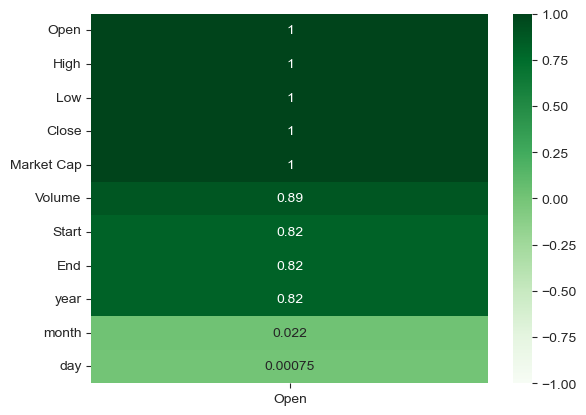

In [122]:
sns.heatmap(df.corr()[['Open']].sort_values(by='Open', ascending=False), vmin=-1, vmax=1, annot=True, cmap='Greens');

In [123]:
df.corr()[["Open"]].sort_values(by="Open", ascending=False)

,Open
Open,1.000000
High,0.999638
Low,0.999518
Close,0.999267
Market Cap,0.999065
Volume,0.889096
Start,0.817679
End,0.817679
year,0.815196
month,0.022235


# Features

# splitting data intp training and test set

In [124]:
x=df[['High','Low','Close','Market Cap','Volume']].values
y=df[['Open']].values


In [125]:
sc=StandardScaler()
x=sc.fit_transform(x)

#split into train and test set
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state=0)


# adding models

In [127]:
models={
    "LinearRegression": LinearRegression(), 
    "Ridge":Ridge(),
    "Lasso":Lasso(),
    "LinearSVR":LinearSVR(), 
    "DecisionTreeRegressor":DecisionTreeRegressor(), 
    "GradientBoostingRegressor":GradientBoostingRegressor(), 
    "AdaBoostRegressor":AdaBoostRegressor(), 
    "RandomForestRegressor":RandomForestRegressor() 
    
}

# Crossvalidation

In [128]:
for name, model in models.items(): 
    scores = cross_val_score(model, x,y, scoring="neg_mean_squared_error",cv=10,n_jobs=-1) 
    print("cross validation model : {}".format(name)) 
    rmse = np.sqrt(-scores) 
    rmse_average = np.mean(rmse) 
    print("AVERAGE RMSE: ",rmse_average) 
    print("*"*100)

cross validation model : LinearRegression
AVERAGE RMSE:  106.16807761040636
****************************************************************************************************
cross validation model : Ridge
AVERAGE RMSE:  143.6581643224371
****************************************************************************************************
cross validation model : Lasso
AVERAGE RMSE:  138.58770747662385
****************************************************************************************************
cross validation model : LinearSVR
AVERAGE RMSE:  4671.482881972561
****************************************************************************************************
cross validation model : DecisionTreeRegressor
AVERAGE RMSE:  301.3954649061177
****************************************************************************************************
cross validation model : GradientBoostingRegressor
AVERAGE RMSE:  252.7907763712855
**********************************************************

# here,We can see that "LinearRegression" is having the best overall performance,so we may proceed with it.

# splitting the data into testing and training set

In [129]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [130]:
model = LinearRegression()

In [131]:
model.fit(x_train, y_train)

LinearRegression()

In [132]:
training_score = model.score(x_train, y_train)*100
training_score

99.9729004524196

In [133]:
testing_score = model.score(x_test, y_test)*100
testing_score

99.97408561580383

In [134]:
R2_score=r2_score(y_test,model.predict(x_test))*100
R2_score

99.97408561580383

# mean absolute error

In [136]:
mae=mean_absolute_error(y_test,model.predict(x_test))
mae

61.92079176425426

# mean squared error

In [137]:
mse=mean_squared_error(y_test,model.predict(x_test))
mse

25290.528607254368

In [138]:
y_pred = model.predict(x)

# find actual and predicted

In [139]:
PREDICTION = pd.DataFrame(zip(y, y_pred), columns=('ACTUAL', 'PREDICTED'), dtype=float)
PREDICTION

,ACTUAL,PREDICTED
0,38701.9700,38932.109774
1,37688.3900,38074.956387
2,37854.6600,37919.199724
3,37832.6700,38125.486185
4,37241.0700,37506.264754
...,...,...
4423,0.0679,5.640387
4424,0.0627,5.635331
4425,0.0699,5.642332
4426,0.0589,5.631637


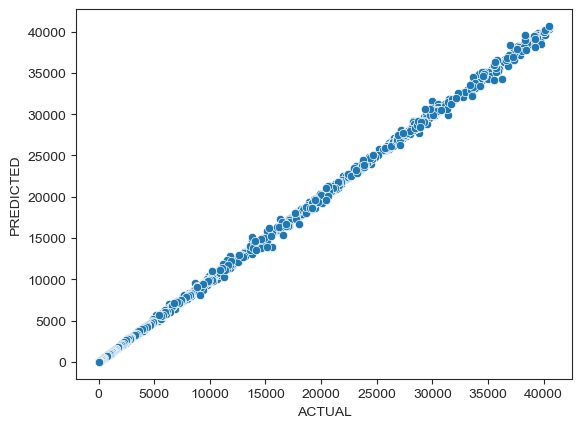

In [140]:
sns.scatterplot(data=PREDICTION, x='ACTUAL',y='PREDICTED')
plt.show()

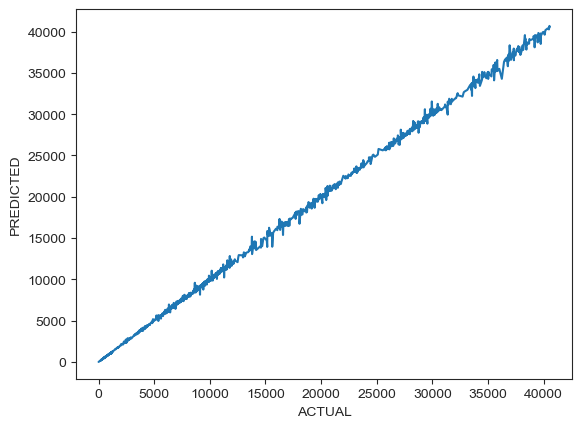

In [141]:
sns.lineplot(data=PREDICTION, x='ACTUAL',y='PREDICTED')
plt.show()

# conclusion

In this analysis, LinearRegression , we did extensive analysis of input data and were able to achieve Test Accuracy of 99.97% 